In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold

In [2]:
pip install celer

Note: you may need to restart the kernel to use updated packages.


In [3]:
import celer as clr
from celer import GroupLasso

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

# DATA EXPLORATION

In [5]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,...,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,...,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,...,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,...,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,9.500,114,5400,23,28,16845.000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.100,...,141,mpfi,3.780,3.150,8.700,160,5300,19,25,19045.000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.100,...,173,mpfi,3.580,2.870,8.800,134,5500,18,23,21485.000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.100,...,145,idi,3.010,3.400,23.000,106,4800,26,27,22470.000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
for (columnName, columnData) in data.iteritems():
    print('\nColumn Name :', columnName)
    print("\nValues :\n", columnData.unique())
    print("\nDistribution :\n" , columnData.value_counts())


Column Name : car_ID

Values :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

Distribution :
 1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Leng

Symboling corresponds to a car’s insurance risk level. Cars are initially assigned a risk factor symbol that corresponds to their price. If an automobile is more dangerous, this symbol is adjusted by increasing it. A value of +3 indicates that the vehicle is risky, while -3 indicates that it is likely safe to insure.

Drivewheel: fwd stands for "front wheel drive", rwd stans for "rear wheel drive", 4wd stands for "four wheel drive".

The “curb weight” of your car is the weight of the vehicle without any passenger or items in it except for the standard equipment that comes with it.

Engine type: dohc stand for "dual overhead camshaft", ohcv stands for "overhead camshaft and valve", ohc stands for "overhead camshaft", l stands for "lineengine", rotor stands for "rotary engine", ohcf stands for "overHead camshaft and valve F engine", 
dohcv stands for "dual overHead cam and valve".

Fuel system: mpfi stands for "multi-point fuel injection system", 2bbl stands for "two barrel carburetor", mfi stands for "multi-port fuel injection", 1bbl stands for "1 barrel carburetor", spfi stands for "spark plug fuel injector", 4bbl stands for "four barrel carburetor", idni stands for "Indirect fuel injection diesel engines", spi stands for "single point injection".

Bore ratio describes the ratio between cylinder bore diameter and piston stroke length.

The compression ratio is defined as the ratio between the volume of the cylinder with the piston in the bottom position (largest volume) and in the top position (smallest volume)

Peakrpm is the maximum rpm of the car. Rpm stands for revolutions per minute, and it’s used as a measure of how fast any machine is operating at a given time. In cars, rpm measures how many times the engine’s crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder.

Mpg, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. Mpg is also the primary measurement of a car's fuel efficiency: the higher a car's mpg, the more fuel efficient it is.

In [10]:
data.drop("car_ID",axis=1,inplace=True)

In [11]:
data["CarName"]=data["CarName"].str.split(n=1,expand=True)[0]

In [12]:
data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
data["CarName"].replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen",
                        "vw":"volkswagen"},inplace=True)

data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
data["doornumber"].replace({"two":2,"four":4}, inplace=True)

data["doornumber"].unique()

array([2, 4], dtype=int64)

In [15]:
data["cylindernumber"].replace({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12},inplace=True)

data["cylindernumber"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [17]:
for (columnName, columnData) in data.iteritems():
    print('\nColumn Name :', columnName)
    print("\nValues :\n", columnData.unique())
    print("\nDistribution :\n" , columnData.value_counts())


Column Name : symboling

Values :
 [ 3  1  2  0 -1 -2]

Distribution :
  0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Column Name : CarName

Values :
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

Distribution :
 toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

Column Name : fueltype

Values :
 ['gas' 'diesel']

Distribution :
 gas       185
diesel     20
Name: fueltype, dtype: int64

Column Name : aspiration

Valu

In [18]:
data["price"].describe()

count     205.000
mean    13276.711
std      7988.852
min      5118.000
25%      7788.000
50%     10295.000
75%     16503.000
max     45400.000
Name: price, dtype: float64

In [19]:
categorical=[]

numerical=[]

numerical_cont=[]

for col in data.columns:
    if data[col].dtype==object:
        categorical.append(col)
    elif data[col].dtype=="int64":
        numerical.append(col)
    elif data[col].dtype=="float64":
        numerical_cont.append(col)

In [20]:
print("categorical: ", categorical,"\n\nnumerical: ",numerical,"\n\nnumerical continuous: ",numerical_cont)

categorical:  ['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'] 

numerical:  ['symboling', 'doornumber', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'] 

numerical continuous:  ['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'price']


# DATA VISUALIZATION

## CATEGORICAL

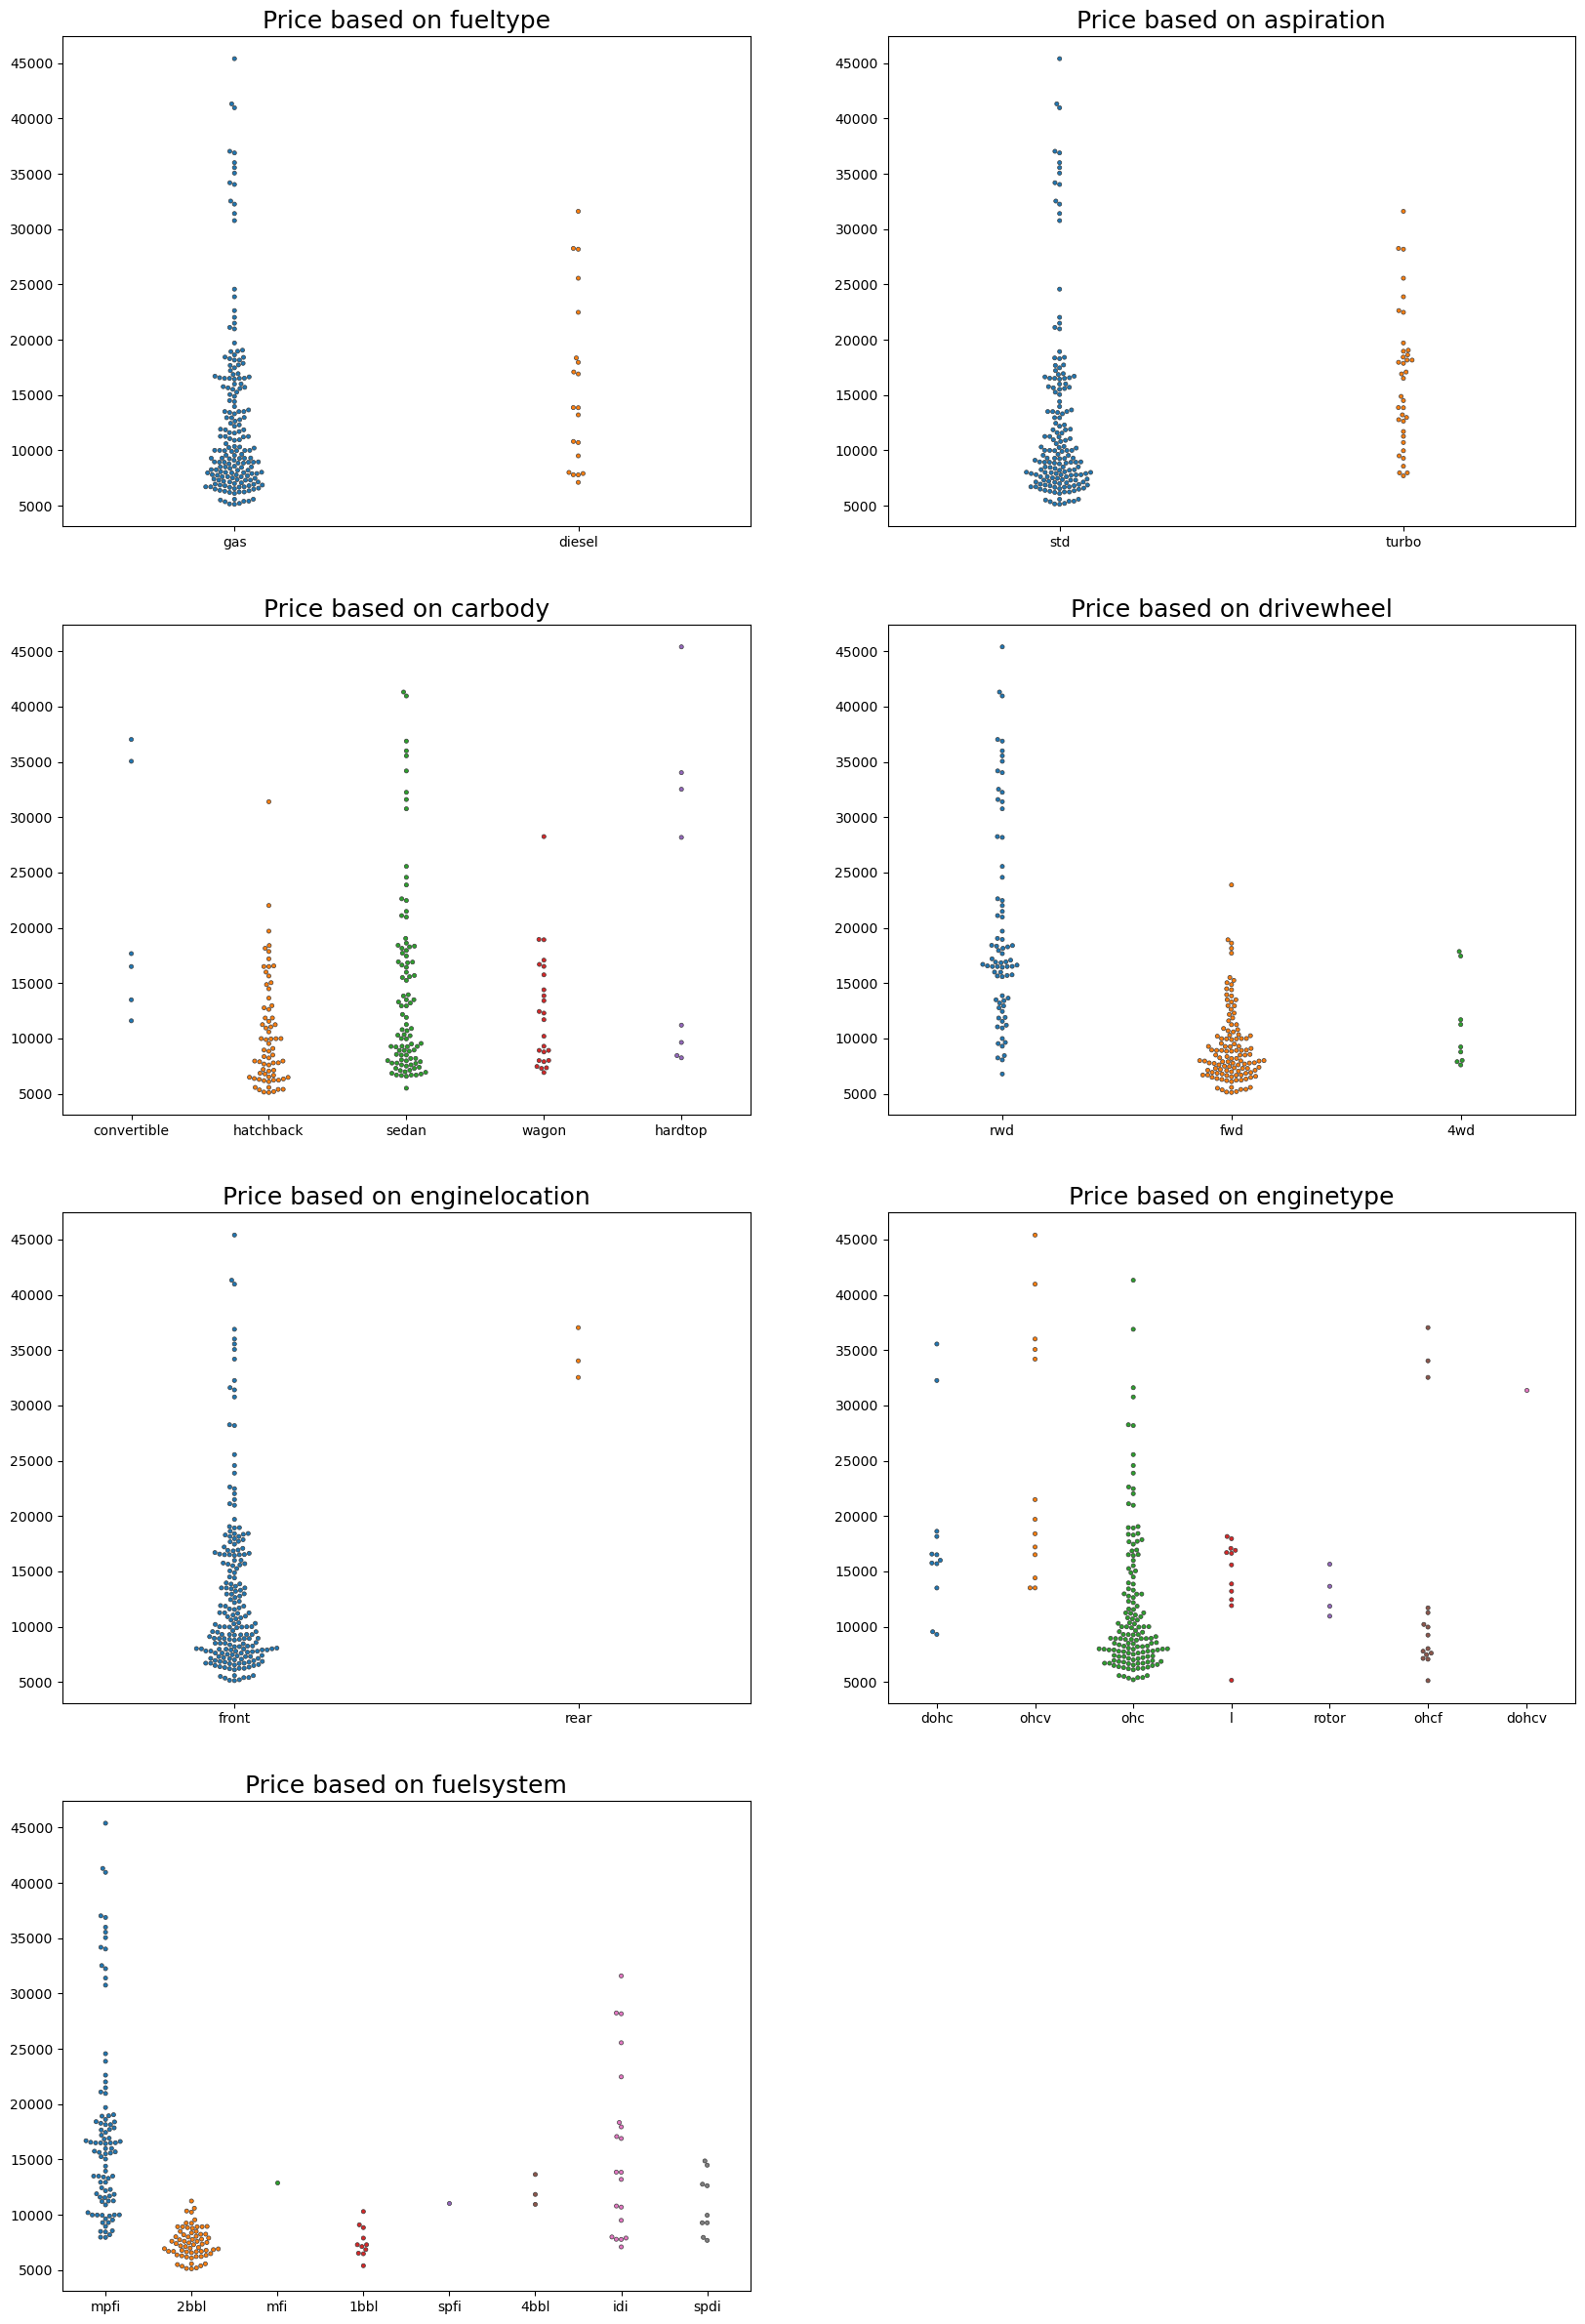

In [19]:
figure(figsize=(20, 30))

for i in range(len(categorical)-1):
    plt.subplot(4,2,i+1)
    sns.swarmplot(data=data,x=data[categorical[i+1]],y=data["price"],linewidth=0.5,size=3)
    plt.title("Price based on %s"%(categorical[i+1]),fontsize=18)
    plt.xlabel(None)
    plt.ylabel(None)

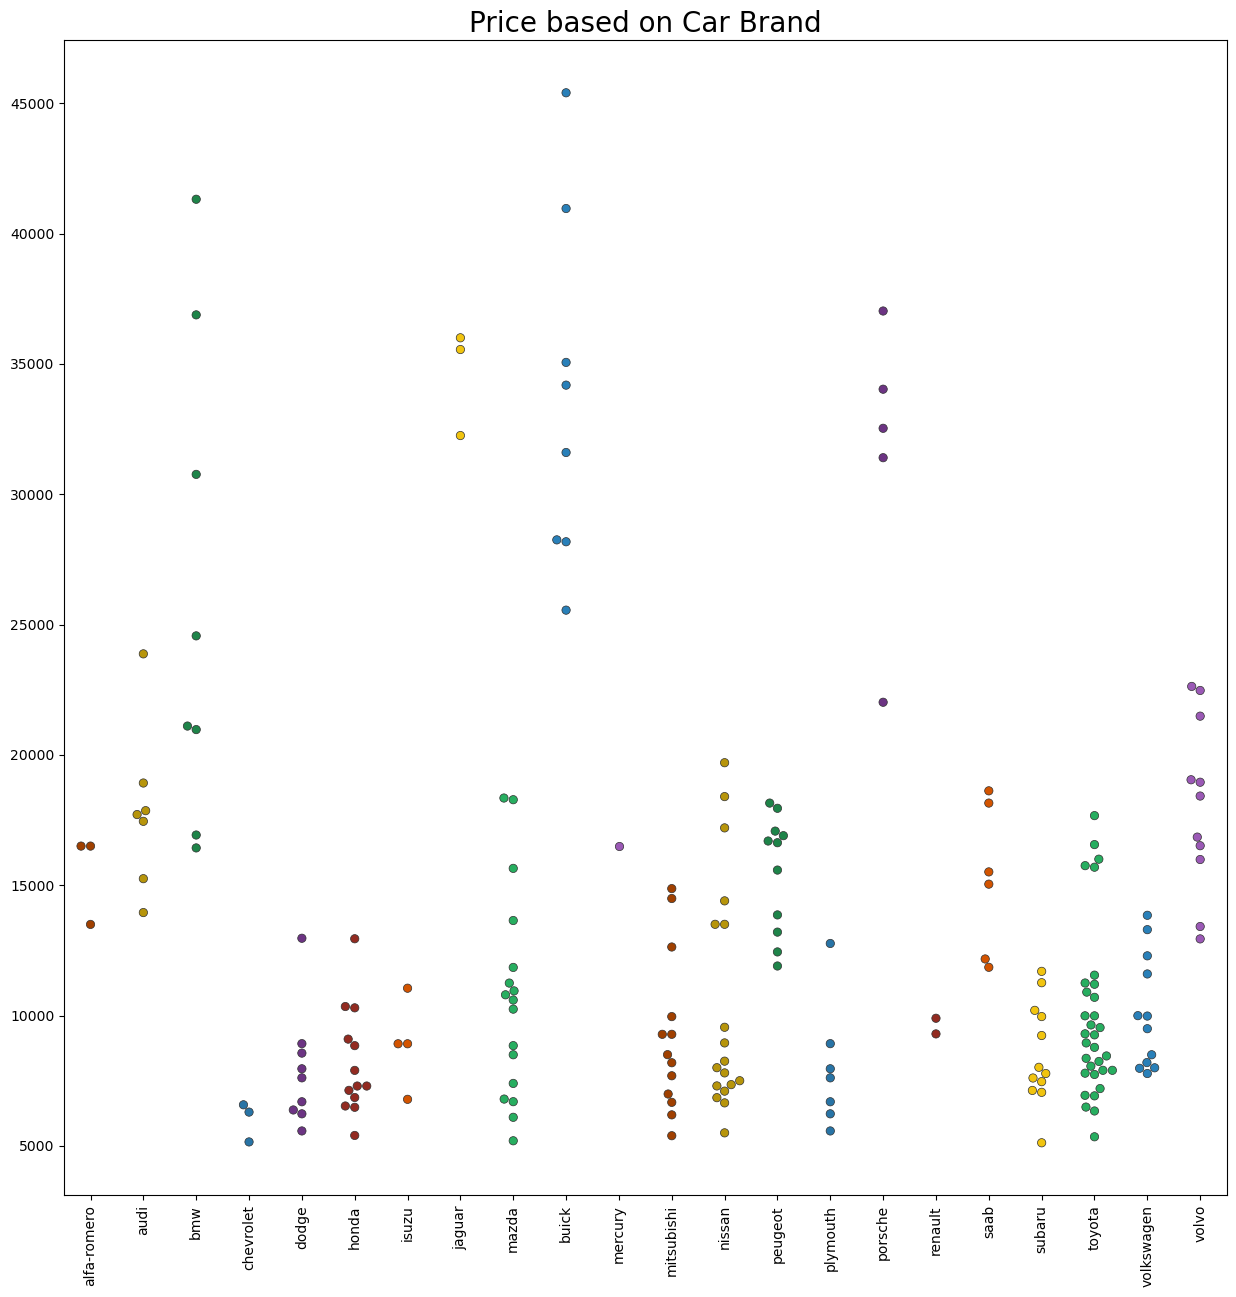

In [20]:
figure(figsize=(15,15))

palette=["#a04000","#b7950b","#1e8449","#2874a6","#6c3483","#922b21","#d35400","#f1c40f","#27ae60","#2980b9","#9b59b6"]

sns.swarmplot(data=data,x=data[categorical[0]],y=data["price"],linewidth=0.5,size=6,palette=palette)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.title("Price based on Car Brand",fontsize=20)
plt.ylabel(None)

plt.show()

## NUMERICAL

In [21]:
numerical_cont

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

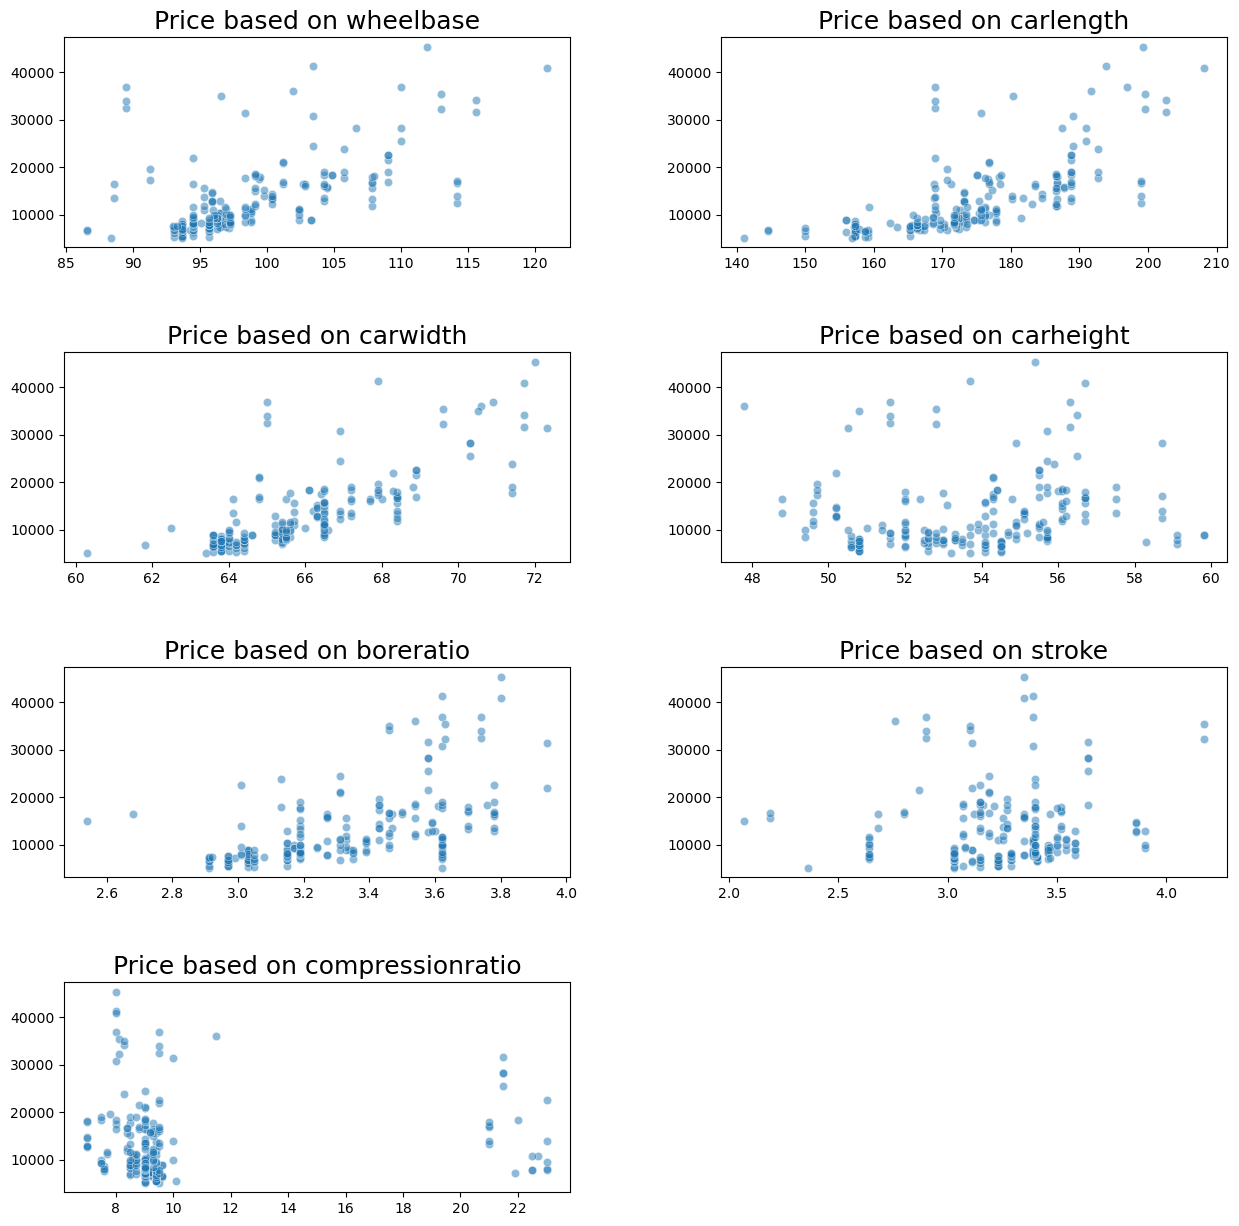

In [22]:
figure(figsize=(15,15))

for i in range(len(numerical_cont)-1):
    ax=plt.subplot(4,2,i+1)
    sns.scatterplot(data=data,x=data[numerical_cont[i]],y=data["price"], alpha=0.5)
    plt.title("Price based on %s"%(numerical_cont[i]),fontsize=18)
    plt.xlabel(None)
    ax.set_ylabel(None)
    
plt.subplots_adjust(wspace=0.3,hspace=0.5)

plt.show()

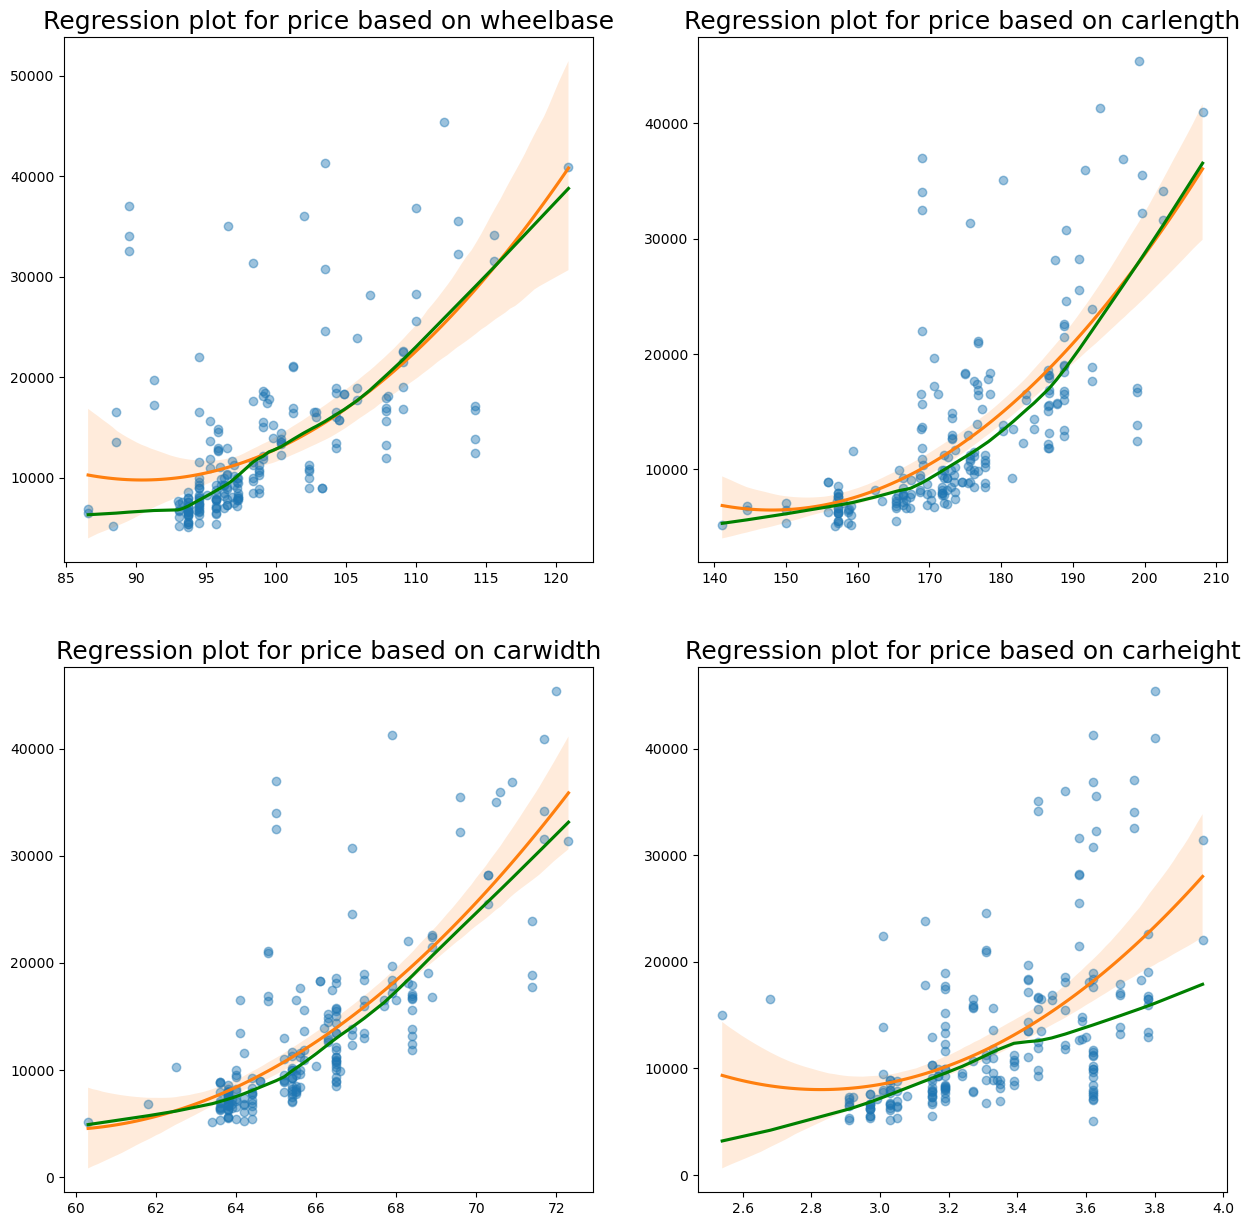

In [23]:
plots=['wheelbase', 'carlength', 'carwidth', 'boreratio']

figure(figsize=(15,15))

for i in range(len(plots)):
    ax=plt.subplot(2,2,i+1)
    sns.regplot(data=data,x=data[plots[i]],y=data["price"],order=2,line_kws={"color": "C1"},scatter_kws={"color":"#1f77b4",
                                                                                                         "alpha":0.25})
    sns.regplot(data=data,x=data[plots[i]],y=data["price"],lowess=True,line_kws={"color": "green"},scatter_kws={"color":"#1f77b4",
                                                                                                                "alpha":0.25})
    plt.title("Regression plot for price based on %s"%(numerical_cont[i]),fontsize=18)
    ax.set_ylabel(None)
    plt.xlabel(None)


In [24]:
numerical

['symboling',
 'doornumber',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

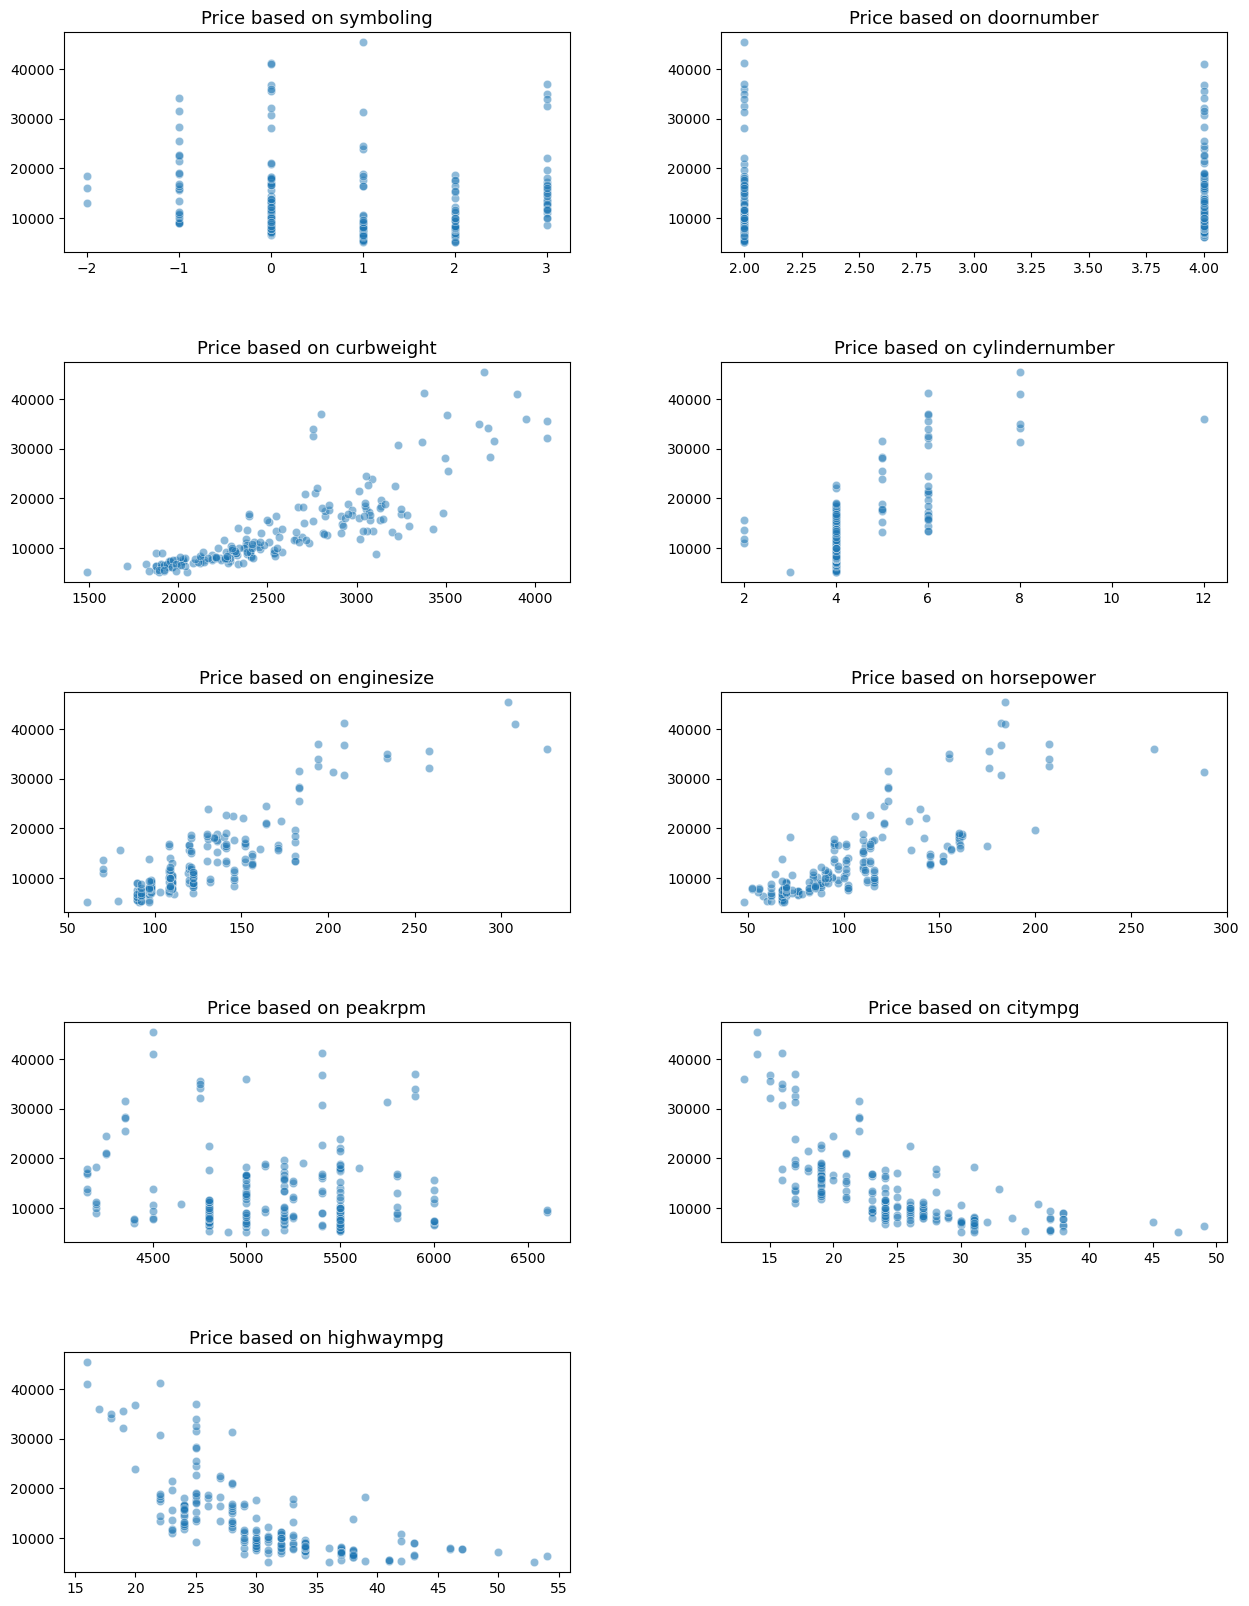

In [25]:
figure(figsize=(15,20))

for i in range(len(numerical)):
    ax=plt.subplot(5,2,i+1)
    sns.scatterplot(data=data,y=data["price"],x=data[numerical[i]],alpha=0.5)
    plt.title("Price based on %s"%(numerical[i]),fontsize=13)
    ax.set_ylabel(None)
    plt.xlabel(None)
    
plt.subplots_adjust(wspace=0.3,hspace=0.5)    
    

c:\Users\Angelo\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


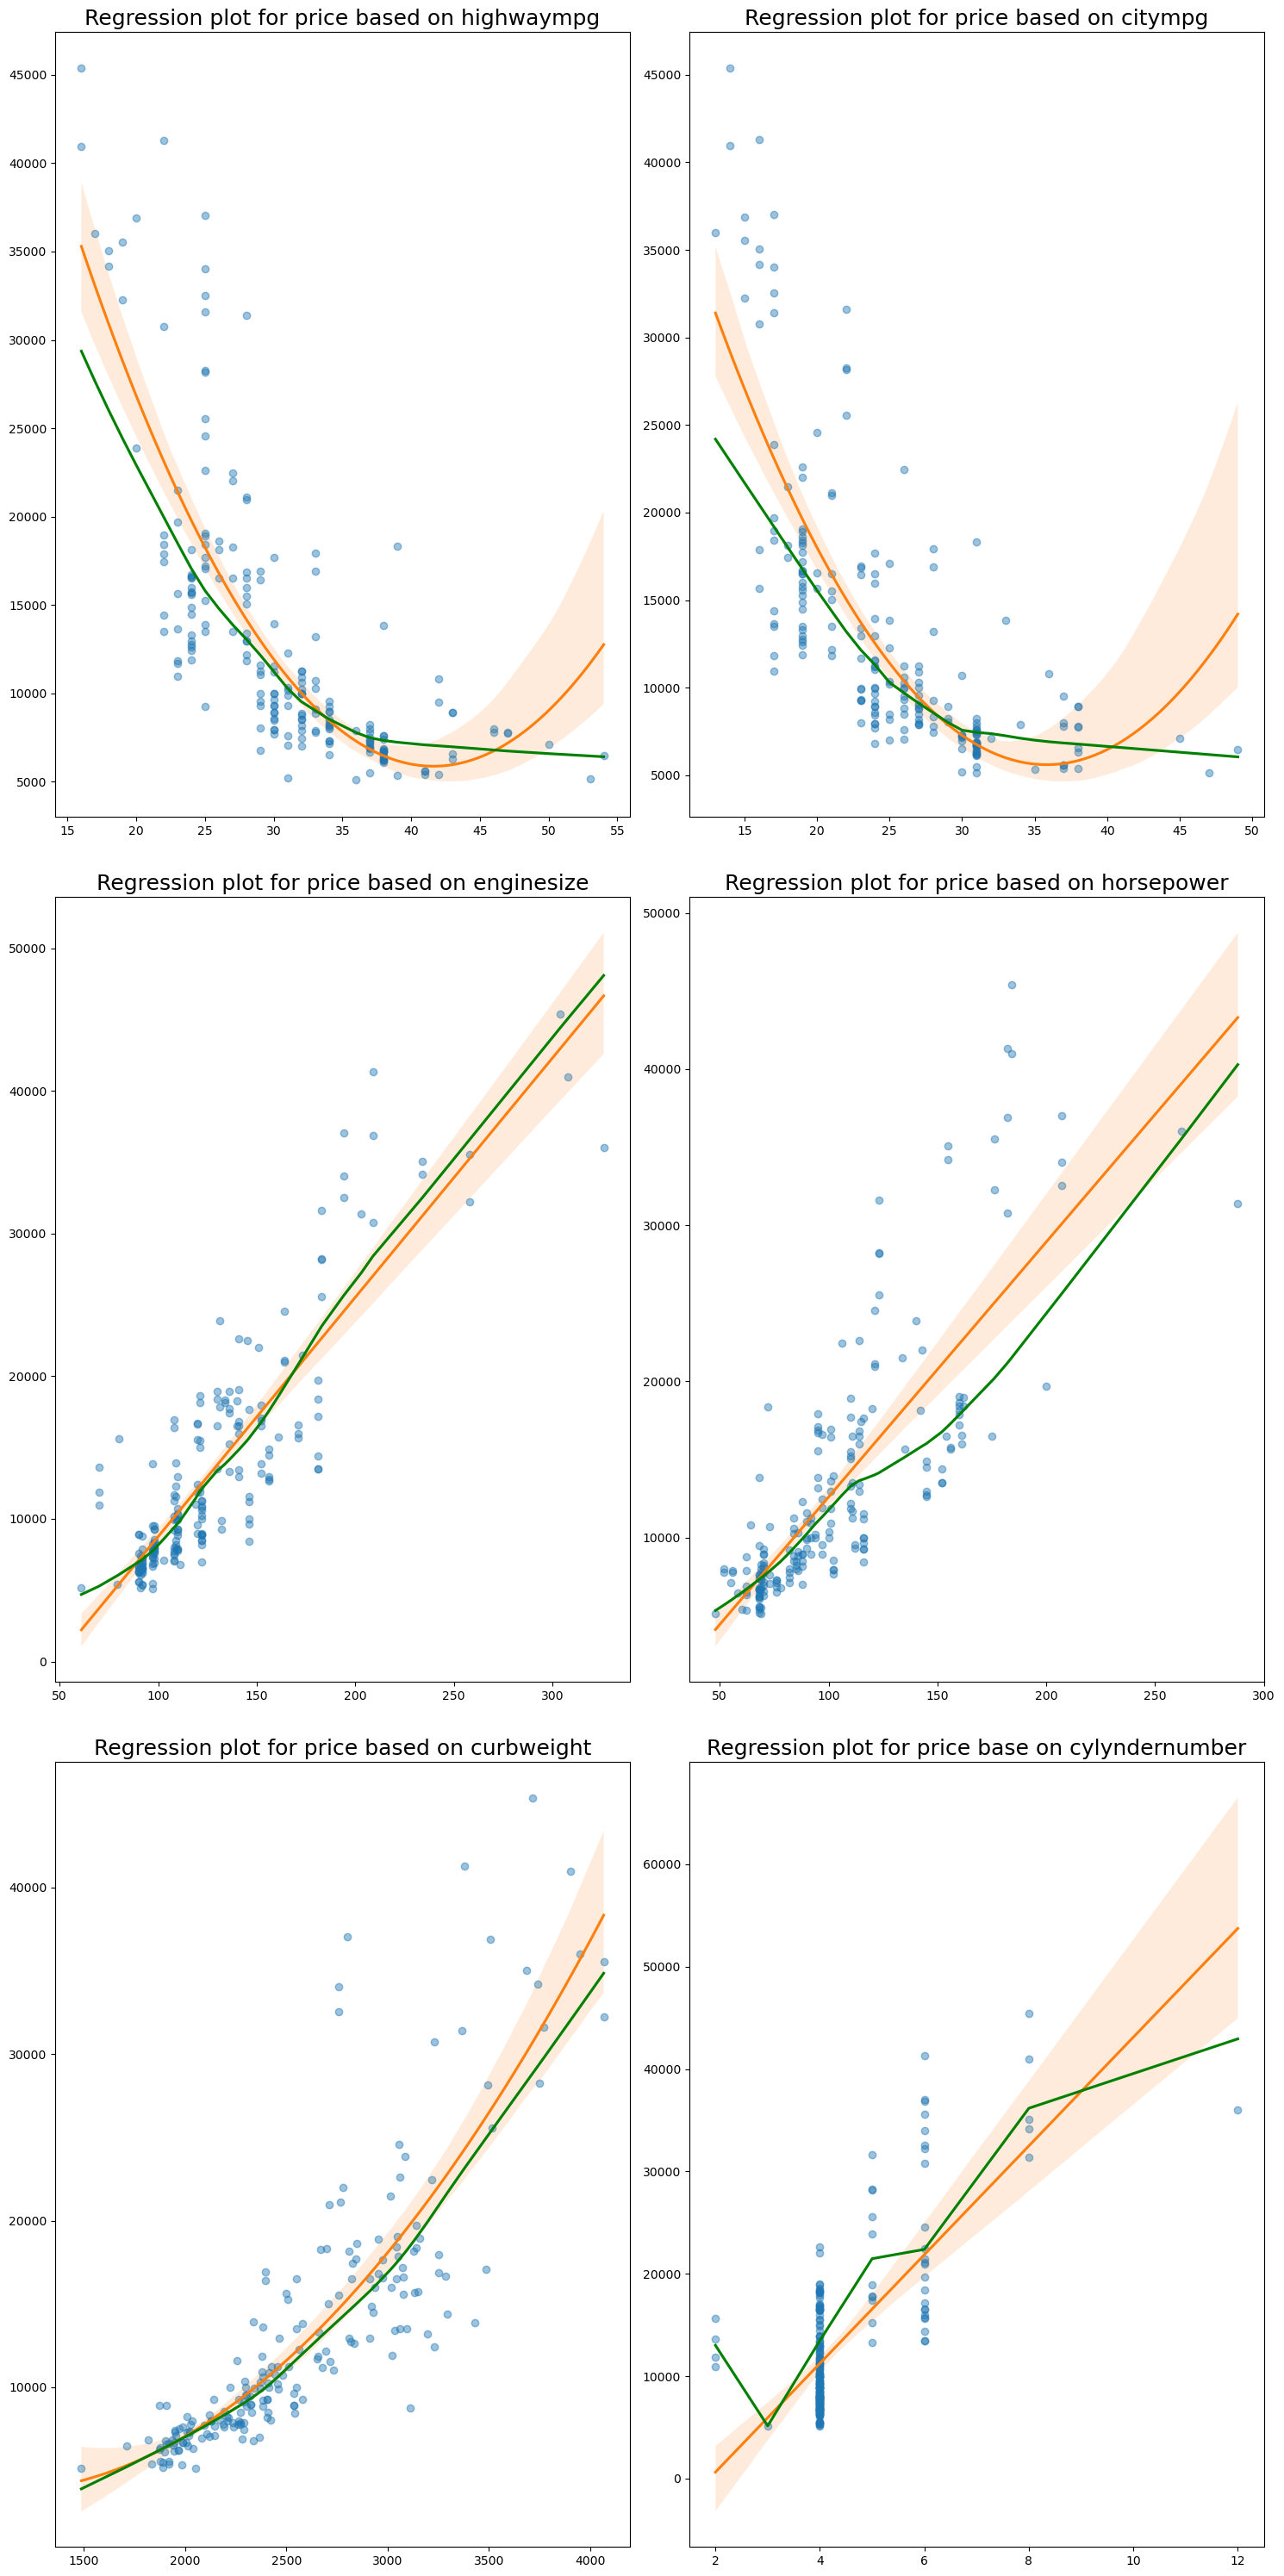

In [21]:
plots_rtn=["highwaympg","citympg"]

plots_lin=["enginesize","horsepower"]


fig,axes=plt.subplots(3,2,figsize=(15,30))

for i in range(2):
    sns.regplot(data=data,x=data[plots_rtn[i]],y=data["price"],order=2,line_kws={"color": "C1"},scatter_kws={"color":"#1f77b4",
                                                                                                         "alpha":0.25},ax=axes[0,i])
    sns.regplot(data=data,x=data[plots_rtn[i]],y=data["price"],lowess=True,line_kws={"color": "green"},scatter_kws={"color":"#1f77b4",
                                                                                                                "alpha":0.25},ax=axes[0,i])
    
for i in range(2):
    sns.regplot(data=data,x=data[plots_lin[i]],y=data["price"],line_kws={"color": "C1"},scatter_kws={"color":"#1f77b4",
                                                                                                         "alpha":0.25},ax=axes[1,i])
    sns.regplot(data=data,x=data[plots_lin[i]],y=data["price"],lowess=True,line_kws={"color": "green"},scatter_kws={"color":"#1f77b4",
                                                                                                                "alpha":0.25},ax=axes[1,i])
    
sns.regplot(data=data,x=data["curbweight"],y=data["price"],order=2,line_kws={"color": "C1"},scatter_kws={"color":"#1f77b4",
                                                                                                         "alpha":0.25},ax=axes[2,0])
sns.regplot(data=data,x=data["curbweight"],y=data["price"],lowess=True,line_kws={"color": "green"},scatter_kws={"color":"#1f77b4",
                                                                                                                "alpha":0.25},ax=axes[2,0])
    
sns.regplot(data=data,x=data["cylindernumber"],y=data["price"],line_kws={"color": "C1"},scatter_kws={"color":"#1f77b4",
                                                                                                         "alpha":0.25},ax=axes[2,1])
sns.regplot(data=data,x=data["cylindernumber"],y=data["price"],lowess=True,line_kws={"color": "green"},scatter_kws={"color":"#1f77b4",
                                                                                                                "alpha":0.25},ax=axes[2,1])
for c in range(3):
    for k in range(2):
        axes[c, k].set_ylabel(None)
        axes[c, k].set_xlabel(None)

for l in range(2):
    axes[0,l].set_title("Regression plot for price based on %s"%(plots_rtn[l]),fontsize=18)
    axes[1,l].set_title("Regression plot for price based on %s"%(plots_lin[l]),fontsize=18)

axes[2,0].set_title("Regression plot for price based on curbweight",fontsize=18)
axes[2,1].set_title("Regression plot for price base on cylyndernumber",fontsize=18)

plt.tight_layout(h_pad=3)
plt.show()


    

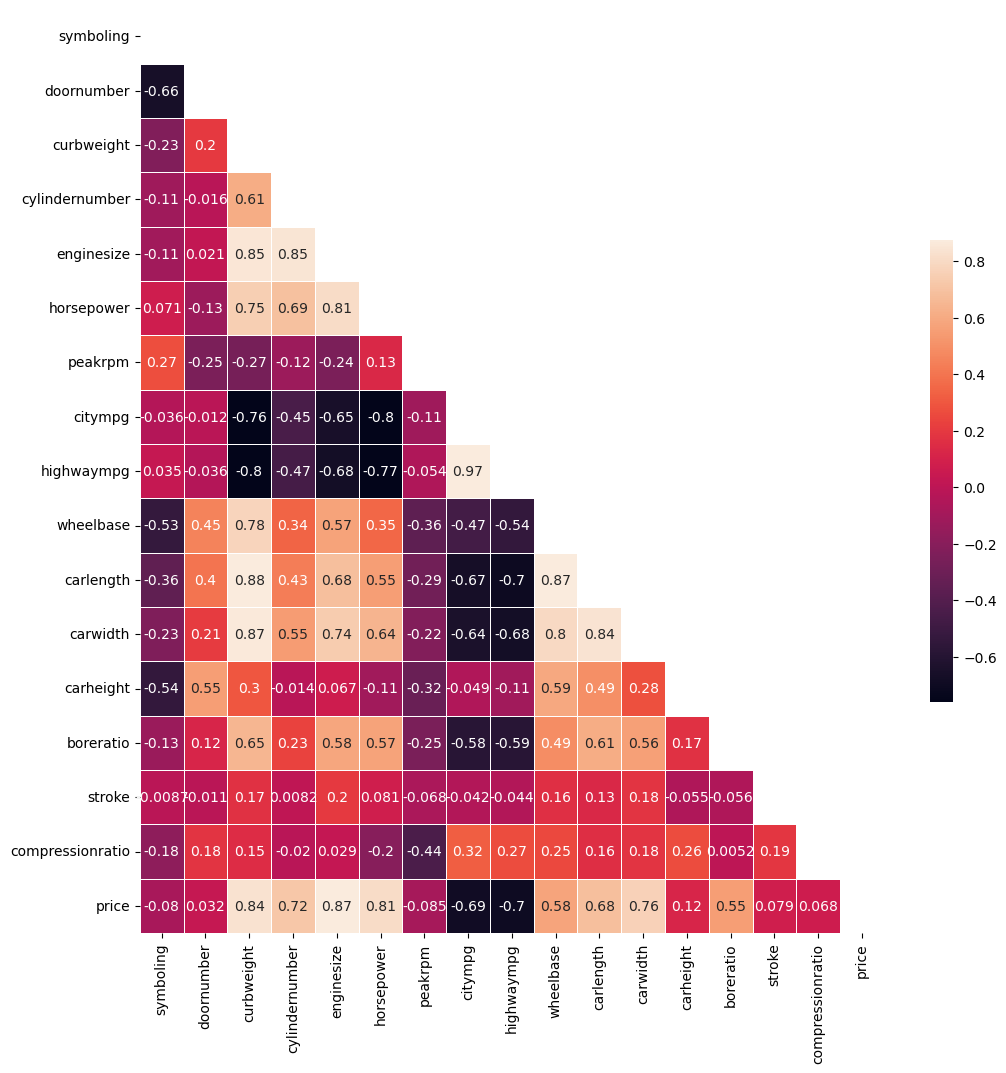

In [27]:
num=numerical+numerical_cont

corr=data[num].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, mask=mask,cbar_kws={"shrink": .5},annot=True,linewidth=.5,robust=True,ax=ax)

plt.show()


# TRAIN-TEST SPLIT

In [36]:
X=data.drop("price",axis=1)

y=data["price"]

rnd=42

kf = KFold(n_splits=5, random_state=rnd, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]

In [39]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  17  19  20  21
  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  48  49  50  51  52  53  54  56  57  58  59  61  62
  63  64  66  70  71  72  74  75  76  77  78  80  81  83  85  87  88  89
  90  91  92  93  94  96  99 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131
 133 134 135 136 137 138 139 140 141 142 144 148 149 150 151 153 155 156
 157 158 160 161 163 165 166 167 169 170 171 172 173 174 176 177 178 179
 180 181 183 184 185 186 187 188 189 190 192 193 196 197 198 199 200 201
 203 204]
  Test:  index=[  9  15  16  18  25  30  45  55  60  65  67  68  69  73  79  82  84  86
  95  97  98 100 101 120 132 143 145 146 147 152 154 159 162 164 168 175
 182 191 194 195 202]
Fold 1:
  Train: index=[  0   1   2   3   4   6   7   8   9  10  11  13  14  15  16  17  18  20
  21  22  23  25  27  28  30  3

In [41]:
X_train2.shape,X_test2.shape,y_train.shape,y_test.shape

((164, 24), (41, 24), (164,), (41,))

# DATA PREPROCESSING

In [42]:
oe1=OrdinalEncoder()

X_cat_train_oe=oe1.fit_transform(X_train[categorical])
X_cat_train_oe=pd.DataFrame(X_cat_train_oe,columns=categorical)

X_cat_train_oe

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,9.000,0.000,0.000,3.000,2.000,0.000,3.000,3.000
1,13.000,1.000,0.000,3.000,2.000,0.000,2.000,5.000
2,19.000,1.000,0.000,4.000,1.000,0.000,3.000,1.000
3,12.000,1.000,0.000,3.000,1.000,0.000,3.000,1.000
4,6.000,1.000,0.000,2.000,1.000,0.000,3.000,0.000
...,...,...,...,...,...,...,...,...
159,12.000,1.000,0.000,2.000,2.000,0.000,5.000,5.000
160,2.000,1.000,0.000,3.000,2.000,0.000,3.000,5.000
161,12.000,1.000,0.000,3.000,1.000,0.000,3.000,1.000
162,19.000,1.000,0.000,2.000,2.000,0.000,0.000,5.000


In [48]:
pipeline_pca=Pipeline([("standard scaler",StandardScaler()),("pca",PCA())])

numerical_cont.remove("price")

X_num_pca_train=X_train[numerical+numerical_cont].drop(["symboling","doornumber","cylindernumber"],axis=1)

X_num_pca_train=pd.DataFrame(pipeline_pca.fit_transform(X_num_pca_train),columns=[f"PC_{i}" 
                                                                                  for i in range(len(X_num_pca_train.columns))])

X_num_pca_train

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12
0,-0.090,3.741,-1.847,1.094,0.270,-0.486,-0.118,-0.369,-0.227,0.246,-0.311,-0.087,-0.489
1,2.307,0.492,3.623,0.469,0.913,0.771,-0.843,0.023,-0.025,0.365,0.034,0.205,-0.207
2,-2.161,1.596,1.633,-0.448,-0.580,0.470,1.287,-0.010,0.222,-0.226,0.153,0.303,-0.001
3,-2.574,0.360,0.144,-0.252,-0.359,-0.105,0.349,0.193,-0.009,-0.085,0.119,-0.153,0.020
4,-1.407,-0.594,-0.715,-1.282,0.137,-0.405,0.044,0.168,-0.081,0.190,0.227,0.045,-0.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2.339,-1.675,-1.061,0.779,0.382,0.548,-0.382,0.132,-0.119,0.016,-0.032,0.197,-0.060
160,2.431,0.907,0.524,0.291,-0.913,1.256,0.314,-0.387,-0.029,-0.335,-0.031,-0.061,0.023
161,-2.598,0.357,0.147,-0.254,-0.365,-0.111,0.344,0.199,0.002,-0.088,0.117,-0.210,0.023
162,2.462,-0.974,-0.717,-0.188,0.388,0.763,-0.066,-0.035,-0.167,-0.127,-0.354,-0.161,0.052


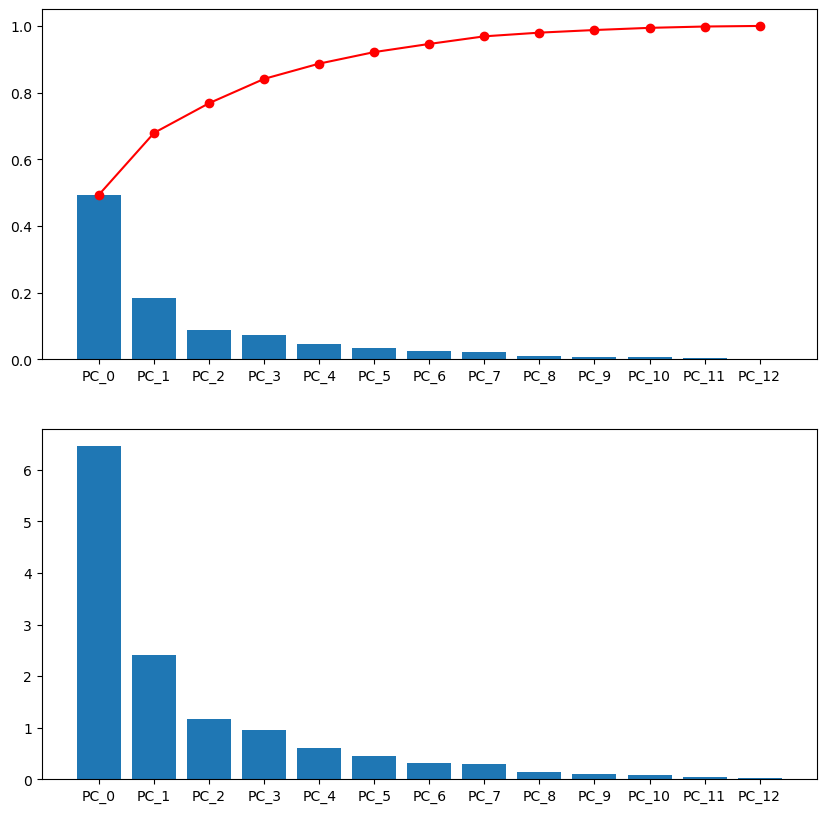

In [27]:
figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot([f"PC_{i}" for i in range(len(X_num_pca_train.columns))], pipeline_pca["pca"].explained_variance_ratio_.cumsum(), "-or")
plt.bar([f"PC_{i}" for i in range(len(X_num_pca_train.columns))], pipeline_pca["pca"].explained_variance_ratio_)

plt.subplot(2,1,2)
plt.bar([f"PC_{i}" for i in range(len(X_num_pca_train.columns))], pipeline_pca["pca"].explained_variance_)

plt.show()

In [30]:
X_num_pca_train=X_num_pca_train[[f"PC_{i}" for i in range(4)]]

In [31]:
X_num_pca_train

,PC_0,PC_1,PC_2,PC_3
0,-0.090,3.741,-1.847,1.094
1,2.307,0.492,3.623,0.469
2,-2.161,1.596,1.633,-0.448
3,-2.574,0.360,0.144,-0.252
4,-1.407,-0.594,-0.715,-1.282
...,...,...,...,...
159,2.339,-1.675,-1.061,0.779
160,2.431,0.907,0.524,0.291
161,-2.598,0.357,0.147,-0.254
162,2.462,-0.974,-0.717,-0.188


In [33]:
oe2=OrdinalEncoder()

X_num_train=oe2.fit_transform(X_train[["symboling","doornumber","cylindernumber"]])
X_num_train=pd.DataFrame(X_num_train,columns=["symboling","doornumber","cylindernumber"])

In [34]:
X_num_train

,symboling,doornumber,cylindernumber
0,2.000,1.000,1.000
1,2.000,1.000,1.000
2,2.000,1.000,1.000
3,3.000,1.000,1.000
4,2.000,0.000,1.000
...,...,...,...
159,3.000,0.000,3.000
160,3.000,1.000,3.000
161,3.000,1.000,1.000
162,5.000,0.000,3.000


# BEST FEATURES

In [35]:
X_cn_train=pd.concat([X_cat_train_oe,X_num_train],axis=1)

X_cn_train

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,symboling,doornumber,cylindernumber
0,9.000,0.000,0.000,3.000,2.000,0.000,3.000,3.000,2.000,1.000,1.000
1,13.000,1.000,0.000,3.000,2.000,0.000,2.000,5.000,2.000,1.000,1.000
2,19.000,1.000,0.000,4.000,1.000,0.000,3.000,1.000,2.000,1.000,1.000
3,12.000,1.000,0.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,1.000
4,6.000,1.000,0.000,2.000,1.000,0.000,3.000,0.000,2.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
159,12.000,1.000,0.000,2.000,2.000,0.000,5.000,5.000,3.000,0.000,3.000
160,2.000,1.000,0.000,3.000,2.000,0.000,3.000,5.000,3.000,1.000,3.000
161,12.000,1.000,0.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,1.000
162,19.000,1.000,0.000,2.000,2.000,0.000,0.000,5.000,5.000,0.000,3.000


In [36]:
y_train=y_train.reset_index(drop=True)

In [37]:
mir1=mutual_info_regression(X_cn_train,y_train,n_neighbors=5,discrete_features=True)
mir2=mutual_info_regression(X_cn_train,y_train,n_neighbors=10,discrete_features=True)
mir3=mutual_info_regression(X_cn_train,y_train,n_neighbors=50,discrete_features=True)

df_scores={"X_features":X_cn_train.columns,"Score_1":mir1,"Score_2":mir2,"Score_3": mir3}
df_scores=pd.DataFrame(df_scores).sort_values(by="Score_1", ascending=False).reset_index(drop=True)

df_scores

,X_features,Score_1,Score_2,Score_3
0,CarName,0.535,0.521,0.518
1,fuelsystem,0.461,0.439,0.369
2,drivewheel,0.301,0.321,0.218
3,cylindernumber,0.282,0.263,0.223
4,enginetype,0.194,0.121,0.156
5,symboling,0.149,0.152,0.034
6,aspiration,0.090,0.091,0.026
7,carbody,0.054,0.066,0.033
8,enginelocation,0.041,0.048,0.058
9,doornumber,0.005,0.020,0.000


# TRAIN-TEST-VAL SPLIT

In [222]:
X_num=oe.fit_transform(X[["symboling","cylindernumber"]])
X_num=pd.DataFrame(X_num,columns=["symboling","cylindernumber"])

X_num_pca=X[numerical+numerical_cont].drop(["symboling","doornumber","cylindernumber"],axis=1)
X_num_pca=pd.DataFrame(pipeline_pca.transform(X_num_pca),columns=[f"PC_{i}" for i in range(len(X_num_pca.columns))])
X_num_pca=X_num_pca[[f"PC_{i}" for i in range(4)]]


X=pd.concat([pd.get_dummies(X[["CarName","fuelsystem","drivewheel","enginetype"]]),X_num,X_num_pca],axis=1)


In [223]:
X

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,symboling,cylindernumber,PC_0,PC_1,PC_2,PC_3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.000,2.000,-0.578,-2.132,0.530,2.354
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.000,2.000,-0.578,-2.132,0.530,2.354
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,3.000,4.000,0.323,-1.287,-1.193,-0.612
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,4.000,2.000,-0.229,-0.099,-0.054,-1.092
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,4.000,3.000,1.207,-1.045,0.067,-1.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1.000,2.000,2.649,0.609,0.925,-0.419
201,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1.000,2.000,3.445,-0.054,0.940,-0.324
202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1.000,4.000,3.375,-0.277,1.459,-0.359
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1.000,4.000,2.079,3.125,-1.162,-0.417


In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rnd)

In [225]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 46), (41, 46), (164,), (41,))

In [226]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=rnd)

In [227]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((131, 46), (33, 46), (131,), (33,))

# MODELS

## LINEAR REGRESSION

In [238]:
lr=LinearRegression()

par_gs_lr={"fit_intercept":[True,False], "positive":[True,False]}

lr_opt_gs =GridSearchCV(lr, par_gs_lr)

lr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [240]:
print('Best parameters: ', lr_opt_gs.best_params_)

Best parameters:  {'fit_intercept': False, 'positive': False}


In [63]:
lr=LinearRegression(fit_intercept=False, positive= False)

lr.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [64]:
y_val_pred_lr=lr.predict(X_val)

r2_score(y_val,y_val_pred_lr)

0.9197496501845861

## ELASTIC NET

In [250]:
en=ElasticNetCV()

par_gs_en={"l1_ratio": np.arange(0,1.05,0.1),"fit_intercept":[True,False],"selection":["cyclic", "random"]}

en_opt_gs =GridSearchCV(en, par_gs_en)

en_opt_gs.fit(X_train,y_train)

C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 1607, in fit
    alphas = [
  File "C:\Users\Angelo\anaconda3\

GridSearchCV(estimator=ElasticNetCV(),
             param_grid={'fit_intercept': [True, False],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'selection': ['cyclic', 'random']})

In [251]:
print('Best parameters: ', en_opt_gs.best_params_)

Best parameters:  {'fit_intercept': False, 'l1_ratio': 1.0, 'selection': 'cyclic'}


In [65]:
en=ElasticNetCV(fit_intercept= False, l1_ratio=1.0, selection= 'cyclic')

en.fit(X_train,y_train)

ElasticNetCV(fit_intercept=False, l1_ratio=1.0)

In [66]:
y_val_pred_en=en.predict(X_val)

r2_score(y_val_pred_en,y_val)

0.8001821429460091

## SUPPORT VECTOR REGRESSION

In [315]:
svr=SVR()

par_gs_svr={"kernel":["linear", "poly", "rbf", "sigmoid"],"gamma":["scale","auto"],"shrinking":[True,False]}

svr_opt_gs=GridSearchCV(svr,par_gs_svr)

svr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [316]:
print('Best parameters: ', svr_opt_gs.best_params_)

Best parameters:  {'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


In [323]:
svr=SVR(gamma="scale",kernel="linear",shrinking=True)

par_gs_svr={"C":[0.2,0.5,1,5,10,50],"epsilon":np.linspace(0.1,1,num=10)}

svr_opt_gs=GridSearchCV(svr,par_gs_svr)

svr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.2, 0.5, 1, 5, 10, 50],
                         'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [324]:
print('Best parameters: ', svr_opt_gs.best_params_)

Best parameters:  {'C': 50, 'epsilon': 1.0}


In [325]:
svr=SVR(gamma="scale",kernel="linear",shrinking=True)

par_gs_svr={"C":list(range(50,200,25)),"epsilon":list(range(1,11))}

svr_opt_gs=GridSearchCV(svr,par_gs_svr)

svr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [50, 75, 100, 125, 150, 175],
                         'epsilon': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [326]:
print('Best parameters: ', svr_opt_gs.best_params_)

Best parameters:  {'C': 175, 'epsilon': 10}


In [334]:
svr=SVR(gamma="scale",kernel="linear",shrinking=True,C=175)

par_gs_svr={"epsilon":[10,50,100,200,300,500]}

svr_opt_gs=GridSearchCV(svr,par_gs_svr)

svr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(C=175, kernel='linear'),
             param_grid={'epsilon': [10, 50, 100, 200, 300, 500]})

In [335]:
print('Best parameters: ', svr_opt_gs.best_params_)

Best parameters:  {'epsilon': 500}


In [339]:
svr=SVR(gamma="scale",kernel="linear",shrinking=True,C=175)

par_gs_svr={"epsilon":[500,600,700,800,900]}

svr_opt_gs=GridSearchCV(svr,par_gs_svr)

svr_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(C=175, kernel='linear'),
             param_grid={'epsilon': [500, 600, 700, 800, 900]})

In [340]:
print('Best parameters: ', svr_opt_gs.best_params_)

Best parameters:  {'epsilon': 800}


In [67]:
svr=SVR(gamma="scale",kernel="linear",shrinking=True,C=175,epsilon=800)

svr.fit(X_train,y_train)

SVR(C=175, epsilon=800, kernel='linear')

In [68]:
y_val_pred_svr=svr.predict(X_val)

r2_score(y_val,y_val_pred_svr)

0.8331245788030062

# RANDOM FOREST REGRESSOR

In [230]:
rf=RandomForestRegressor()

par_gs_rf={"criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
          "max_features":["sqrt", "log2", None],"bootstrap":[True,False]}

rf_opt_gs=RandomizedSearchCV(rf,par_gs_rf)

rf_opt_gs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_features': ['sqrt', 'log2', None]})

In [231]:
print('Best parameters: ', rf_opt_gs.best_params_)

Best parameters:  {'max_features': 'log2', 'criterion': 'squared_error', 'bootstrap': False}


In [233]:
rf=RandomForestRegressor(max_features= "log2",criterion="squared_error", bootstrap= False)

par_gs_rf={"n_estimators": list(range(50,300,50)),"max_depth":list(range(4,14,2))}

rf_opt_gs=GridSearchCV(rf,par_gs_rf)

rf_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(bootstrap=False,
                                             max_features='log2'),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [71]:
xgb=XGBRegressor(booster="dart",learning_rate=0.15,n_estimators=60,subsample=1,reg_lambda=0.2,reg_alpha=0.2,max_depth=3,
                colsample_bytree=0.6)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
y_val_pred_xgb=xgb.predict(X_val)

r2_score(y_val,y_val_pred_xgb)

0.8723341187057623

## VOTING REGRESSOR

In [73]:
vr=VotingRegressor([("xgb",xgb),("rf",rf),("lr",lr)])

vr.fit(X_train,y_train)

y_val_pred_vr=vr.predict(X_val)

r2_score(y_val,y_val_pred_vr)

0.9074948157070163

# MODEL EVALUATION

In [245]:
X_train,y_train=pd.concat([X_train,X_val], axis=0),pd.concat([y_train,y_val],axis=0)

In [246]:
rf.fit(X_train,y_train), xgb.fit(X_train,y_train),lr.fit(X_train,y_train),vr.fit(X_train,y_train)

algo={"Random Forest":rf,"XGB Regressor":xgb,"Linear Regression":lr,"Voting Regressor": vr}

def r2_score_test(algorithms, X_test, y_test):
    r2_scores = {}
    for alg_name, alg in algorithms.items():
        y_pred = alg.predict(X_test)
        r2_scores[alg_name] = round(r2_score(y_test, y_pred),3)
    return r2_scores
        
        

In [247]:
r2_score_test(algo,X_test,y_test)

{'Random Forest': 0.901,
 'XGB Regressor': 0.901,
 'Linear Regression': 0.853,
 'Voting Regressor': 0.915}

In [248]:
algo2={"Random Forest":rf,"XGB Regressor":xgb,"Voting Regressor": vr}

def scores_test(algorithms, X_test, y_test):
    scores = {}
    for alg_name, alg in algorithms.items():
        y_pred = alg.predict(X_test)
        scores[alg_name] = ("Mae={:.3f}, Mse={:.3f}, Rmse={:.3f}, Rmsle={:.3f} ".format(mean_absolute_error(y_test,y_pred),
                            mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),
                            np.log(np.sqrt(mean_squared_error(y_test,y_pred)))) )
    return scores

In [249]:
scores_test(algo2, X_test, y_test)

{'Random Forest': 'Mae=1675.348, Mse=7779596.250, Rmse=2789.193, Rmsle=7.934 ',
 'XGB Regressor': 'Mae=1754.890, Mse=7793802.657, Rmse=2791.738, Rmsle=7.934 ',
 'Voting Regressor': 'Mae=1592.657, Mse=6675700.779, Rmse=2583.738, Rmsle=7.857 '}

# FEATURE IMPORTANCE

In [290]:
def feature_importance(n_best_ft, alg):
    scores_df = pd.DataFrame(alg.feature_importances_)
    columns_df = pd.DataFrame(X_train.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    #ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    best_features.index+=1
    return best_features

In [291]:
def feature_importance_lr(n_best_ft,alg):
    scores_df = pd.DataFrame(abs(lr.coef_)/sum(lr.coef_))
    columns_df = pd.DataFrame(X_train.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    #ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    best_features.index+=1
    return best_features

In [289]:
print("Random Forest:\n",feature_importance(10,rf),"\n\nXgb:\n",feature_importance(10,xgb),"\n\nLinear Regression:\n",
     feature_importance_lr(10,lr))

Random Forest:
           X_feature  Score
1              PC_0  0.220
2    cylindernumber  0.156
3    drivewheel_rwd  0.079
4              PC_1  0.065
5    drivewheel_fwd  0.061
6     CarName_buick  0.052
7   fuelsystem_2bbl  0.048
8              PC_3  0.045
9   fuelsystem_mpfi  0.043
10             PC_2  0.041 

Xgb:
           X_feature  Score
1    cylindernumber  0.211
2   fuelsystem_mpfi  0.160
3     CarName_buick  0.122
4              PC_0  0.114
5    drivewheel_fwd  0.096
6   CarName_porsche  0.071
7   enginetype_ohcf  0.065
8    drivewheel_rwd  0.047
9      CarName_saab  0.026
10             PC_1  0.019 

Linear Regression:
            X_feature  Score
1      CarName_buick  0.174
2     CarName_subaru  0.165
3    enginetype_ohcf  0.133
4     CarName_jaguar  0.116
5        CarName_bmw  0.091
6     drivewheel_4wd  0.086
7     drivewheel_fwd  0.079
8    CarName_porsche  0.079
9   enginetype_rotor  0.079
10    drivewheel_rwd  0.077


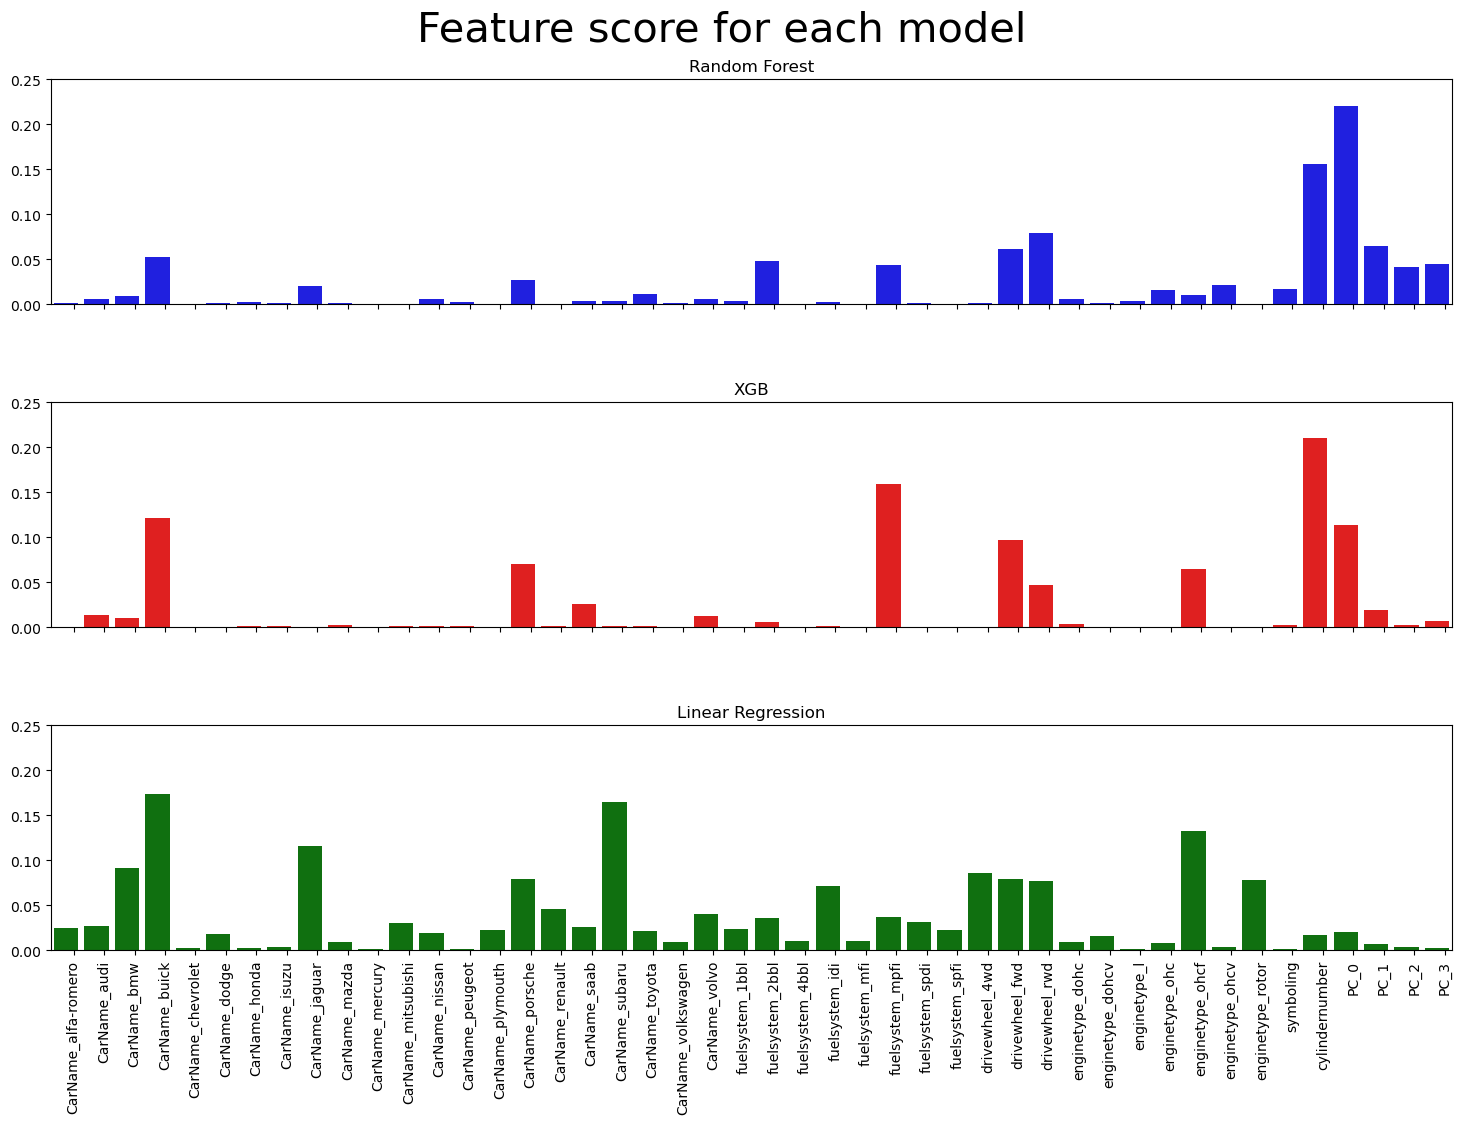

In [361]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,10),sharex=True,sharey=True)
fig.suptitle("Feature score for each model",fontsize=30)

sns.barplot(data=feature_importance(len(X_train.columns),rf), x=feature_importance(len(X_train.columns),rf)["X_feature"],
            y=feature_importance(len(X_train.columns),rf)["Score"],color="blue",ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title("Random Forest")

sns.barplot(data=feature_importance(len(X_train.columns),xgb), x=feature_importance(len(X_train.columns),xgb)["X_feature"],
            y=feature_importance(len(X_train.columns),xgb)["Score"],color="red",ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.set_title("XGB")

sns.barplot(data=feature_importance_lr(len(X_train.columns),lr), x=feature_importance_lr(len(X_train.columns),lr)["X_feature"],
            y=feature_importance_lr(len(X_train.columns),lr)["Score"],color="green",ax=ax3)
ax3.set_ylabel(None)
ax3.set_xlabel(None)
ax3.set_title("Linear Regression")

plt.tight_layout(h_pad=5)
plt.xticks(ind+width,X_train.columns, rotation=90,fontsize=10)
plt.yticks(ticks=np.arange(0,0.30,0.050))
plt.show()

# MODELS WITHOUT FEATURES SELECTION

In [ ]:
X_cat=data[categorical]

X_num_cont=data[numerical_cont+numerical].drop(["symboling","doornumber","cylindernumber"],axis=1)

X_num=data[["symboling","doornumber","cylindernumber"]]

y=data["price"]

In [158]:
X_num_cont_train,X_num_cont_test,y_tr,y_te=train_test_split(X_num_cont,y,test_size=0.2,random_state=rnd)

In [159]:
scaler=StandardScaler()

oe3=OrdinalEncoder()

X_cat=pd.get_dummies(X_cat)

X_num_cont_train=pd.DataFrame(scaler.fit_transform(X_num_cont_train),columns=X_num_cont.columns)
X_num_cont_test=pd.DataFrame(scaler.transform(X_num_cont_test),columns=X_num_cont.columns)
X_num_cont=pd.concat([X_num_cont_train,X_num_cont_test],ignore_index=True)

X_num=pd.DataFrame(oe3.fit_transform(X_num),columns=X_num.columns)

In [160]:
X_num_cont

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,1.037,0.072,0.084,0.277,0.406,1.215,3.100,0.281,0.188,-0.815,-1.918,0.964,1.314
1,1.541,1.044,1.170,1.207,0.517,-3.360,-0.440,1.016,-0.159,-0.242,-0.293,-0.988,-1.025
2,-0.509,-0.368,-1.097,2.178,-1.007,-0.710,-0.283,-0.542,-0.853,-1.065,-0.699,0.964,1.002
3,-0.711,-0.733,-1.003,0.317,-0.635,0.111,-0.179,-1.147,-0.729,-0.890,0.113,0.964,1.002
4,-0.375,-0.550,-0.341,-0.168,-0.635,1.026,-0.283,-0.524,-0.407,-0.466,1.332,0.314,0.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.290,-0.177,-0.247,0.236,1.112,-1.940,-0.622,-0.091,-0.456,0.157,-0.699,-0.175,-0.245
201,-0.576,-0.426,-0.105,-1.665,0.034,0.000,-0.179,-0.346,-1.398,-0.092,1.738,-1.314,-1.180
202,-0.711,-1.513,-1.097,-0.694,-1.081,-0.457,-0.127,-1.269,-0.903,-0.865,0.520,2.103,1.937
203,-0.475,-0.077,0.178,-1.422,1.001,1.909,-0.804,0.724,0.733,1.005,-0.293,-0.988,-1.025


In [161]:
X=pd.concat([X_cat,X_num_cont,X_num],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rnd)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 67), (41, 67), (164,), (41,))

In [162]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=rnd)

X_train.shape,X_val.shape,y_train.shape,y_val.shape

((131, 67), (33, 67), (131,), (33,))

## Linear regression

In [163]:
lr2=LinearRegression()

par_gs_lr2={"fit_intercept":[True,False], "positive":[True,False]}

lr2_opt_gs =GridSearchCV(lr2, par_gs_lr2)

lr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]})

In [164]:
print('Best parameters: ', lr2_opt_gs.best_params_)

Best parameters:  {'fit_intercept': False, 'positive': True}


In [165]:
lr2=LinearRegression(fit_intercept=False,positive=True)

lr2.fit(X_train,y_train)

y_val_pred_lr2=lr2.predict(X_val)

r2_score(y_val,y_val_pred_lr2)

0.8078465702040274

## Random forest regressor

In [167]:
rf2=RandomForestRegressor()

par_gs_rf2={ "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
            "max_features":["sqrt", "log2", None],"bootstrap":[True,False]}

rf2_opt_gs=GridSearchCV(rf2,par_gs_rf2)

rf2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None]})

In [168]:
print('Best parameters: ', rf2_opt_gs.best_params_)

Best parameters:  {'bootstrap': False, 'criterion': 'absolute_error', 'max_features': 'sqrt'}


In [170]:
rf2=RandomForestRegressor(bootstrap=False,criterion="absolute_error",max_features="sqrt")

par_gs_rf2={"n_estimators": list(range(200,500,50)),"max_depth":list(range(4,14,2))}

rf2_opt_gs=GridSearchCV(rf2,par_gs_rf2)

rf2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(bootstrap=False,
                                             criterion='absolute_error',
                                             max_features='sqrt'),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [200, 250, 300, 350, 400, 450]})

In [171]:
print('Best parameters: ', rf2_opt_gs.best_params_)

Best parameters:  {'max_depth': 10, 'n_estimators': 250}


In [175]:
rf2=RandomForestRegressor(bootstrap=False,criterion="absolute_error",max_features="sqrt",max_depth=10,n_estimators=250)

rf2.fit(X_train,y_train)

y_val_pred_rf2=rf2.predict(X_val)

r2_score(y_val,y_val_pred_rf2)

0.5442096868965454

## XGB regressor

In [176]:
xgb2=XGBRegressor()

par_gs_xgb2={"booster":["gblinear","gbtree","dart"],"learning_rate":np.arange(0.05,0.25,0.05)}

xgb2_opt_gs=GridSearchCV(xgb2,par_gs_xgb2)

xgb2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...e,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gblinear', 'gbtree', 'dart'],
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 ])})

In [177]:
print('Best parameters: ', xgb2_opt_gs.best_params_)

Best parameters:  {'booster': 'gblinear', 'learning_rate': 0.05}


In [180]:
xgb2=XGBRegressor(booster="gblinear")

par_gs_xgb2={"learning_rate":np.linspace(0.01,0.05,5),"n_estimators":list(range(50,300,50))}

xgb2_opt_gs=GridSearchCV(xgb2,par_gs_xgb2)

xgb2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05]),
                         'n_estimators': [50, 100, 150, 200, 250]})

In [181]:
print('Best parameters: ', xgb2_opt_gs.best_params_)

Best parameters:  {'learning_rate': 0.02, 'n_estimators': 50}


In [182]:
xgb2=XGBRegressor(booster="gblinear",learning_rate=0.02)

par_gs_xgb2={"n_estimators":[10,20,30,40,50]}

xgb2_opt_gs=GridSearchCV(xgb2,par_gs_xgb2)

xgb2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.02, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [10, 20, 30, 40, 50]})

In [183]:
print('Best parameters: ', xgb2_opt_gs.best_params_)

Best parameters:  {'n_estimators': 50}


In [185]:
xgb2=XGBRegressor(booster="gblinear",learning_rate=0.02,n_estimators=50)

par_gs_xgb2={"eval_metric":["rmse","mae","logloss"]}

xgb2_opt_gs=GridSearchCV(xgb2,par_gs_xgb2)

xgb2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.02, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eval_metric': ['rmse', 'mae', 'logloss']})

In [186]:
print('Best parameters: ', xgb2_opt_gs.best_params_)

Best parameters:  {'eval_metric': 'mae'}


In [188]:
xgb2=XGBRegressor(booster="gblinear",learning_rate=0.02,n_estimators=50,eval_metric="mae")

par_gs_xgb2={"reg_alpha":np.linspace(0,1,num=6),"reg_lambda":np.linspace(0,1,num=6)}

xgb2_opt_gs=GridSearchCV(xgb2,par_gs_xgb2)

xgb2_opt_gs.fit(X_train,y_train)


GridSearchCV(estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric='mae',
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.02...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'reg_alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'reg_lambda': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])})

In [189]:
print('Best parameters: ', xgb2_opt_gs.best_params_)

Best parameters:  {'reg_alpha': 0.8, 'reg_lambda': 0.0}


In [190]:
xgb2=XGBRegressor(booster="gblinear",learning_rate=0.02,n_estimators=50,eval_metric="mae",reg_alpha=0.8,reg_lambda=0)

xgb2.fit(X_train,y_train)

y_val_pred_xgb2=xgb2.predict(X_val)

r2_score(y_val,y_val_pred_xgb2)

0.635716822316418

## Support vector regression

In [191]:
svr2=SVR()

par_gs_svr2={"kernel":["linear", "poly", "rbf", "sigmoid"],"gamma":["scale","auto"],"shrinking":[True,False]}

svr2_opt_gs=GridSearchCV(svr2,par_gs_svr2)

svr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [192]:
print('Best parameters: ', svr2_opt_gs.best_params_)

Best parameters:  {'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


In [194]:
svr2=SVR(gamma="scale",kernel="linear",shrinking=True)

par_gs_svr2={"C":[0.2,0.5,1,5,10,50],"epsilon":np.linspace(0.1,1,num=10)}

svr2_opt_gs=GridSearchCV(svr2,par_gs_svr2)

svr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.2, 0.5, 1, 5, 10, 50],
                         'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [195]:
print('Best parameters: ', svr2_opt_gs.best_params_)

Best parameters:  {'C': 50, 'epsilon': 0.1}


In [197]:
svr2=SVR(gamma="scale",kernel="linear",shrinking=True)

par_gs_svr2={"C":list(range(50,350,50)),"epsilon":np.linspace(0.02,0.1,num=5)}

svr2_opt_gs=GridSearchCV(svr2,par_gs_svr2)

svr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [50, 100, 150, 200, 250, 300],
                         'epsilon': array([0.02, 0.04, 0.06, 0.08, 0.1 ])})

In [198]:
print('Best parameters: ', svr2_opt_gs.best_params_)

Best parameters:  {'C': 300, 'epsilon': 0.1}


In [201]:
svr2=SVR(gamma="scale",kernel="linear",shrinking=True,epsilon=0.1)

par_gs_svr2={"C":list(range(300,1300,50))}

svr2_opt_gs=GridSearchCV(svr2,par_gs_svr2)

svr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [300, 350, 400, 450, 500, 550, 600, 650, 700, 750,
                               800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200,
                               1250]})

In [202]:
print('Best parameters: ', svr2_opt_gs.best_params_)

Best parameters:  {'C': 1250}


In [205]:
svr2=SVR(gamma="scale",kernel="linear",shrinking=True,epsilon=0.1)

par_gs_svr2={"C":list(range(1250,5000,100))}

svr2_opt_gs=GridSearchCV(svr2,par_gs_svr2)

svr2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950,
                               2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750,
                               2850, 2950, 3050, 3150, 3250, 3350, 3450, 3550,
                               3650, 3750, 3850, 3950, 4050, 4150, ...]})

In [206]:
print('Best parameters: ', svr2_opt_gs.best_params_)

Best parameters:  {'C': 4250}


In [208]:
svr2=SVR(gamma="scale",kernel="linear",shrinking=True,epsilon=0.1,C=4250)

svr2.fit(X_train,y_train)

y_val_pred_svr2=svr2.predict(X_val)

r2_score(y_val,y_val_pred_svr2)

0.8416080243994649

## Elastic Net

In [209]:
en2=ElasticNetCV()

par_gs_en2={"l1_ratio": np.arange(0,1.05,0.1),"fit_intercept":[True,False],"selection":["cyclic", "random"]}

en2_opt_gs =GridSearchCV(en2, par_gs_en2)

en2_opt_gs.fit(X_train,y_train)

C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 1607, in fit
    alphas = [
  File "C:\Users\Angelo\anaconda3\

GridSearchCV(estimator=ElasticNetCV(),
             param_grid={'fit_intercept': [True, False],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'selection': ['cyclic', 'random']})

In [210]:
print('Best parameters: ', en2_opt_gs.best_params_)

Best parameters:  {'fit_intercept': True, 'l1_ratio': 1.0, 'selection': 'cyclic'}


In [211]:
en2=ElasticNetCV(fit_intercept=True,l1_ratio=1,selection="cyclic")

par_gs_en2={"max_iter":[1000,2000,5000,10000],"n_alphas":[100,200,500,1000]}

en2_opt_gs =GridSearchCV(en2, par_gs_en2)

en2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNetCV(l1_ratio=1),
             param_grid={'max_iter': [1000, 2000, 5000, 10000],
                         'n_alphas': [100, 200, 500, 1000]})

In [212]:
print('Best parameters: ', en2_opt_gs.best_params_)

Best parameters:  {'max_iter': 1000, 'n_alphas': 1000}


In [214]:
en2=ElasticNetCV(fit_intercept=True,l1_ratio=1,selection="cyclic")

par_gs_en2={"n_alphas":list(range(1000,5500,500))}

en2_opt_gs =GridSearchCV(en2, par_gs_en2)

en2_opt_gs.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNetCV(l1_ratio=1),
             param_grid={'n_alphas': [1000, 1500, 2000, 2500, 3000, 3500, 4000,
                                      4500, 5000]})

In [215]:
print('Best parameters: ', en2_opt_gs.best_params_)

Best parameters:  {'n_alphas': 1000}


In [217]:
en2=ElasticNetCV(fit_intercept=True,l1_ratio=1,selection="cyclic",n_alphas=1000)

en2.fit(X_train,y_train)

y_val_pred_en2=en2.predict(X_val)

r2_score(y_val,y_val_pred_en2)

0.7309595731483429

## Models evaluation

In [218]:
X_train,y_train=pd.concat([X_train,X_val], axis=0),pd.concat([y_train,y_val],axis=0)

In [219]:
lr2.fit(X_train,y_train), svr2.fit(X_train,y_train),en2.fit(X_train,y_train)

algo={"Linear Regression":lr2,"Support vector regressor": svr2,"Elastic net cv": en2}

def r2_score_test(algorithms, X_test, y_test):
    r2_scores = {}
    for alg_name, alg in algorithms.items():
        y_pred = alg.predict(X_test)
        r2_scores[alg_name] = round(r2_score(y_test, y_pred),3)
    return r2_scores

In [220]:
r2_score_test(algo,X_test,y_test)

{'Linear Regression': 0.812,
 'Support vector regressor': 0.805,
 'Elastic net cv': 0.819}

R2_score for algorithms with features selection:

 'Random Forest': 0.9 -
 'XGB Regressor': 0.901 -
 'Linear Regression': 0.853 -
 'Voting Regressor': 0.916 -